In [11]:
import pandas as pd
import numpy as np
import os
import glob
import os
import subprocess
import pandas as pd
import numpy as np
from scipy.stats import iqr
from statsmodels.formula.api import ols
from scipy.stats import zscore
from nipype.interfaces.fsl import ImageMaths
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
# Create bar plot
plt.style.use('seaborn-v0_8-poster')
#plt.style.use('seaborn-v0_8')
fontsize = 11
plt.rcParams.update({
    "font.size": fontsize,          # Global font size
    "axes.labelsize": fontsize,     # X and Y axis labels
    "axes.titlesize": fontsize,     # Title (if used)
    "xtick.labelsize": fontsize,    # X-axis tick labels
    "ytick.labelsize": fontsize,    # Y-axis tick labels
    "legend.fontsize": fontsize,    # Legend font size
})

In [12]:
project_dir = '/Users/xiaoqianxiao/projects/OCD'
data_dir = os.path.join(project_dir, 'results/STV_group')
result_dir = os.path.join(project_dir, 'results/visualization')
if not os.path.exists(result_dir):
    os.makedirs(result_dir, exist_ok=True)

In [13]:
baseline_group_diff_file = os.path.join(data_dir, 'group_diff_baseline_tfce_corrp_tstat1.nii.gz')

/Users/xiaoqianxiao/PycharmProjects/OCD/.venv/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:313: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


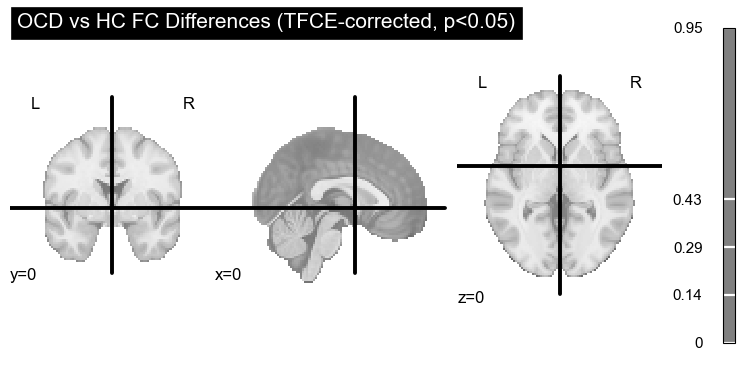

In [15]:
#1. Group Difference at Baseline
# OCD baseline 45
# HC baseline 23
from nilearn import plotting
plotting.plot_stat_map(
    baseline_group_diff_file,
    threshold=0.95,
    display_mode="ortho",
    cut_coords=(0, 0, 0),
    title="OCD vs HC FC Differences (TFCE-corrected, p<0.05)"
)
plotting.show()

In [21]:
fsl_cluster = "/Users/xiaoqianxiao/fsl/bin/fsl-cluster"

tfce_corrp_file = baseline_group_diff_file
output_file = os.path.join(result_dir, 'BaselineGroupDiff_methods-RandomiseWITHtfce_threshold-0.05.nii.gz')


# Step 1: Threshold and binarize
threshold = ImageMaths()
threshold.inputs.in_file = tfce_corrp_file
threshold.inputs.op_string = "-thr 1 -bin"
threshold.inputs.out_file = output_file
threshold.run()

# Step 2: Run cluster and save cluster-labeled output
cluster_output_file = output_file.replace('.nii.gz', '_clusters.nii.gz')
print(f"Cluster output: {cluster_output_file}")

cluster_cmd = [
    fsl_cluster,
    "--in=" + tfce_corrp_file,
    "--thresh=0.4",
    "--mm",
    "--oindex=" + cluster_output_file
]

try:
    result = subprocess.run(cluster_cmd, check=True, capture_output=True, text=True)
    print("Cluster summary:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("Error running cluster command:")
    print(e.stderr)

Cluster output: /Users/xiaoqianxiao/projects/OCD/results/visualization/BaselineGroupDiff_methods-RandomiseWITHtfce_threshold-0.05_clusters.nii.gz
Cluster summary:
Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
13	5215	0.575	6	-26	30	-3.99	-47.2	10.2
12	45	0.448	-18	24	2	-15.1	22.8	4.86
11	43	0.451	18	-86	-26	15.6	-86.2	-25.4
10	9	0.423	24	-76	-28	24.2	-76.7	-26.9
9	6	0.411	20	-54	-26	19.3	-53.3	-25.7
8	5	0.414	24	-88	-38	24	-88	-38
7	4	0.416	-48	-54	-34	-48	-54	-33
6	4	0.414	0	38	8	1.5	39.5	8
5	3	0.411	14	24	4	13.3	24	3.33
4	2	0.406	26	-90	-30	25	-90	-30
3	1	0.402	12	-86	-34	12	-86	-34
2	1	0.412	-24	-56	-34	-24	-56	-34
1	1	0.406	16	22	10	16	22	10



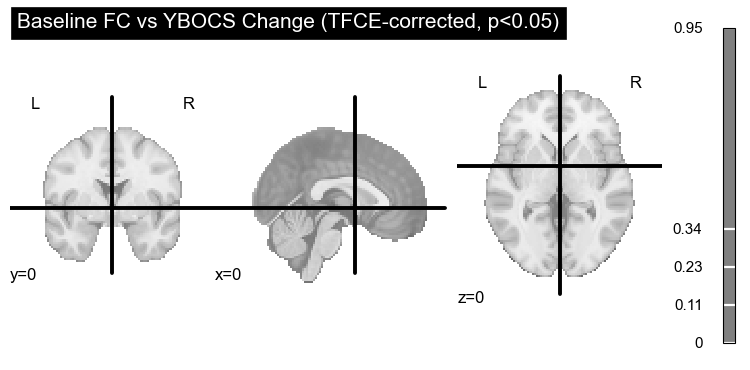

In [26]:
#2. Baseline FC vs. Symptom Change
# OCD 42
baseline_fc_vs_deltaYBOCS = os.path.join(data_dir, 'baselineFC_vs_deltaYBOCS_tfce_corrp_tstat1.nii.gz')
plotting.plot_stat_map(
    baseline_fc_vs_deltaYBOCS,
    threshold=0.95,
    display_mode="ortho",
    cut_coords=(0, 0, 0),
    title="Baseline FC vs YBOCS Change (TFCE-corrected, p<0.05)"
)
plotting.show()

In [32]:
fsl_cluster = "/Users/xiaoqianxiao/fsl/bin/fsl-cluster"

tfce_corrp_file = baseline_fc_vs_deltaYBOCS
output_file = os.path.join(result_dir, 'baselineFC_vs_deltaYBOCS_methods-RandomiseWITHtfce_threshold-0.05.nii.gz')


# Step 1: Threshold and binarize
threshold = ImageMaths()
threshold.inputs.in_file = tfce_corrp_file
threshold.inputs.op_string = "-thr 1 -bin"
threshold.inputs.out_file = output_file
threshold.run()

# Step 2: Run cluster and save cluster-labeled output
cluster_output_file = output_file.replace('.nii.gz', '_clusters.nii.gz')
print(f"Cluster output: {cluster_output_file}")

cluster_cmd = [
    fsl_cluster,
    "--in=" + tfce_corrp_file,
    "--thresh=0.2",
    "--mm",
    "--oindex=" + cluster_output_file
]

try:
    result = subprocess.run(cluster_cmd, check=True, capture_output=True, text=True)
    print("Cluster summary:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("Error running cluster command:")
    print(e.stderr)

Cluster output: /Users/xiaoqianxiao/projects/OCD/results/visualization/baselineFC_vs_deltaYBOCS_methods-RandomiseWITHtfce_threshold-0.05_clusters.nii.gz
Cluster summary:
Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
1	1070	0.457	2	-62	40	-0.459	-56.1	38



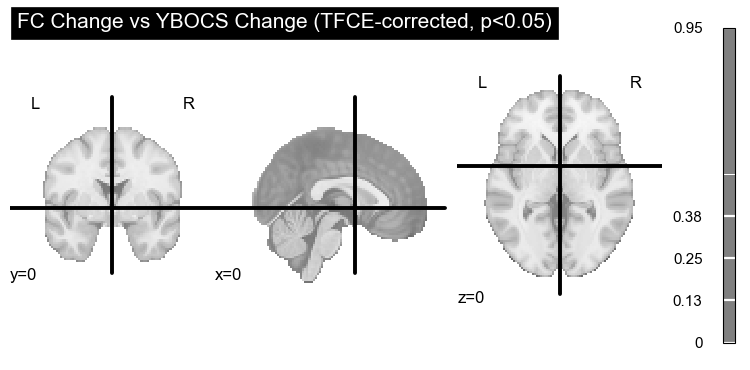

In [27]:
#3. FC Change vs. Symptom Change
deltaFC_vs_deltaYBOCS = os.path.join(data_dir, 'deltaFC_vs_deltaYBOCS_tfce_corrp_tstat1.nii.gz')
plotting.plot_stat_map(
    deltaFC_vs_deltaYBOCS,
    threshold=0.95,
    display_mode="ortho",
    cut_coords=(0, 0, 0),
    title="FC Change vs YBOCS Change (TFCE-corrected, p<0.05)"
)
plotting.show()

In [30]:
fsl_cluster = "/Users/xiaoqianxiao/fsl/bin/fsl-cluster"

tfce_corrp_file = deltaFC_vs_deltaYBOCS
output_file = os.path.join(result_dir, 'deltaFC_vs_deltaYBOCS_methods-RandomiseWITHtfce_threshold-0.05.nii.gz')


# Step 1: Threshold and binarize
threshold = ImageMaths()
threshold.inputs.in_file = tfce_corrp_file
threshold.inputs.op_string = "-thr 1 -bin"
threshold.inputs.out_file = output_file
threshold.run()

# Step 2: Run cluster and save cluster-labeled output
cluster_output_file = output_file.replace('.nii.gz', '_clusters.nii.gz')
print(f"Cluster output: {cluster_output_file}")

cluster_cmd = [
    fsl_cluster,
    "--in=" + tfce_corrp_file,
    "--thresh=0.5",
    "--mm",
    "--oindex=" + cluster_output_file
]

try:
    result = subprocess.run(cluster_cmd, check=True, capture_output=True, text=True)
    print("Cluster summary:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("Error running cluster command:")
    print(e.stderr)

Cluster output: /Users/xiaoqianxiao/projects/OCD/results/visualization/deltaFC_vs_deltaYBOCS_methods-RandomiseWITHtfce_threshold-0.05_clusters.nii.gz
Cluster summary:
Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
1	1	0.507	2	-60	14	2	-60	14

